<a href="https://colab.research.google.com/github/pkpk1717/MNIST-digit-recognition-using-Keras/blob/master/1st_DNN_completed_99_40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


(60000, 28, 28)


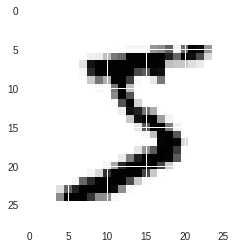

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
Y_test[:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [11]:
from keras.layers import Activation
model = Sequential()


# model.add(Convolution2D(128, 3, 3, activation='relu', input_shape=(28,28,1)))
# # model.add(Convolution2D(10, 1, activation='relu'))
# # model.add(Convolution2D(10, 26))
# model.add(Convolution2D(256,3,3, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Convolution2D(512,3,3, activation='relu'))
# model.add(Convolution2D(1024,3,3, activation='relu'))
# model.add(Convolution2D(10,1,activation='relu'))
# model.add(Convolution2D(10,8))
# model.add(Flatten())
# model.add(Activation('softmax'))
model.add(Convolution2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.5))
model.add(Convolution2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.5))
model.add(Convolution2D(128, (3, 3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
# model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [20]:
model.fit(X_train, Y_train, batch_size=120, nb_epoch=12, verbose=1)

Epoch 1/12
 1080/60000 [..............................] - ETA: 7s - loss: 0.0787 - acc: 0.9787

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 6s 108us/step - loss: 0.0577 - acc: 0.9831
Epoch 2/12
60000/60000 [==============================] - 6s 106us/step - loss: 0.0548 - acc: 0.9836
Epoch 3/12
60000/60000 [==============================] - 6s 104us/step - loss: 0.0493 - acc: 0.9854
Epoch 4/12
60000/60000 [==============================] - 6s 103us/step - loss: 0.0469 - acc: 0.9864
Epoch 5/12
60000/60000 [==============================] - 6s 103us/step - loss: 0.0445 - acc: 0.9866
Epoch 6/12
60000/60000 [==============================] - 6s 102us/step - loss: 0.0427 - acc: 0.9873
Epoch 7/12
60000/60000 [==============================] - 6s 102us/step - loss: 0.0431 - acc: 0.9873
Epoch 8/12
60000/60000 [==============================] - 6s 101us/step - loss: 0.0415 - acc: 0.9875
Epoch 9/12
60000/60000 [==============================] - 6s 102us/step - loss: 0.0410 - acc: 0.9878
Epoch 10/12
60000/60000 [==============================] - 6s 101us/step - loss: 0.0366 - acc: 0.9884


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [22]:
print(score)

[0.020080408887385784, 0.994]


In [0]:
y_pred = model.predict(X_test)

In [24]:
print(y_pred[:9])
print(y_test[:9])

[[2.10210555e-14 2.71419709e-09 8.19390689e-09 3.63882013e-09
  1.09272513e-11 1.24094460e-13 1.38667720e-18 1.00000000e+00
  2.21673071e-12 6.50250298e-10]
 [5.71873321e-12 2.94724328e-10 1.00000000e+00 1.28952502e-12
  1.19452642e-11 3.34344191e-15 2.67475264e-10 7.48882239e-13
  2.37776153e-11 1.22235977e-14]
 [9.83436110e-10 9.99998927e-01 5.53610313e-08 2.78131518e-10
  9.39035605e-09 3.20364144e-08 3.31406014e-08 1.03165155e-06
  2.34271678e-08 8.86743845e-10]
 [9.99989152e-01 1.37692735e-09 1.57590541e-09 2.44692555e-09
  1.04020415e-09 1.59328073e-09 1.04813089e-05 1.60545785e-10
  1.84091764e-08 3.46263903e-07]
 [2.75248709e-13 2.53160604e-10 3.19969583e-13 4.96330708e-16
  9.99999285e-01 3.64963268e-13 9.10853316e-13 3.07155408e-12
  1.76181264e-10 6.61341119e-07]
 [9.85490162e-11 9.99999285e-01 2.94189051e-09 7.65266583e-12
  1.95413774e-09 7.94796506e-10 4.88525553e-10 6.63701030e-07
  3.58351016e-09 2.88848417e-10]
 [1.17008145e-08 1.02499989e-07 9.33963018e-10 1.68983577e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

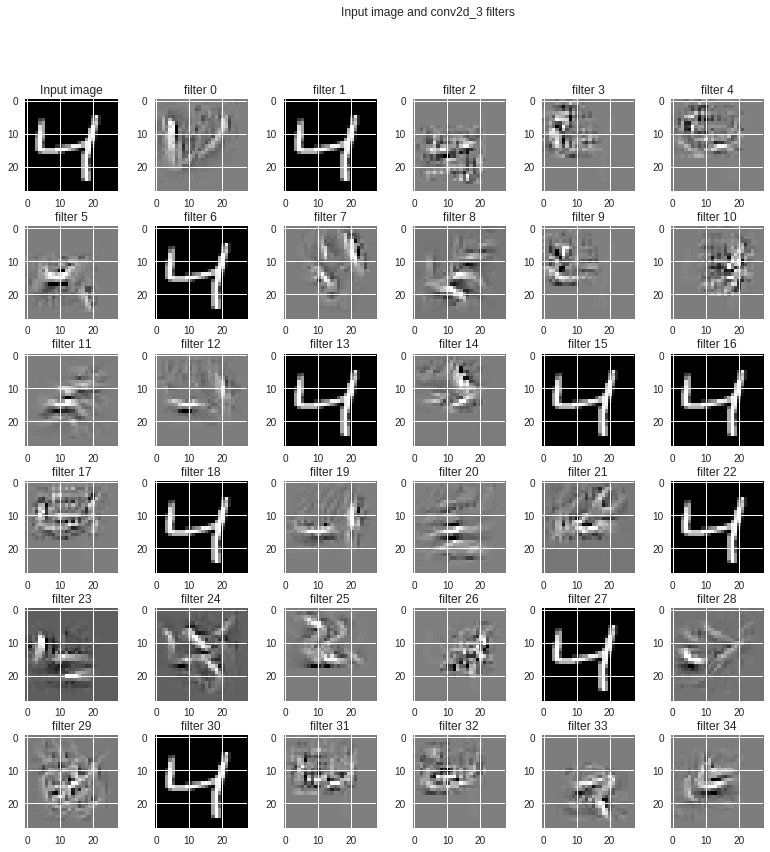

In [26]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_3'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28,28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()